# Matteo Zortea, Alessandro Rizzi  
## Brain Inspired Computing - Sheet 2  
## Group G3A8  
### Exercises solved  
Ex 1: a) b) c)  
Ex 2: a) b)  
Ex 3: 1) 2) 3) 4)  
Ex 4: a) b) c) d)


# Exercise 1  
The LIF model is described by a differential equation of the type
\begin{equation}
    C_m \, \frac{du(t)}{dt} = g_L \, \left(E_L - u(t)\right) + I_{ext}(t)
\end{equation}
when the membrane potential is below the treshold value $u_{th}$.  
If one then wants to take account of various effects such as inhibitory or excitatory pre-synaptic inputs, spike rate adaption or refractary periods, one can add more terms to equation (1), but the equation can always be recasted into one that is formally analogue to (1), as we will show in exercise 2. Hence we can solve equation (1) having in mind that more complex equations have the same solution, formally speaking.  
It is convenient to work in the Laplace's domain. The differential equation becomes
\begin{equation*}
    s \tilde u(s) - u(0) = \frac{E_L}{s\tau} - \frac{\tilde u(s)}{\tau} + \frac{\tilde I_{ext}(s)}{C_m}
\end{equation*}
where we have defined $\tau \equiv C_m/g_L$. The last equation can be rearranged into
\begin{equation*}
    \tilde u(s) = \frac{u(0)}{s+1/\tau} + \frac{E_L}{s \tau (s+1/\tau)} + \frac{\tilde I(s)}{C_m(s+1/\tau)} = \frac{u(0)}{s+1/\tau} +  E_L \left(\frac{1}{s} - \frac{1}{s + 1/\tau} \right)+ \frac{\tilde I(s)}{C_m(s+1/\tau)}
\end{equation*}

We can now proceed by antitransforming
\begin{equation}
    u(t) = u_(t=0) e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \mathcal{L}^{-1} \left[\frac{\tilde I(s)}{C_m(s+1/\tau)}\right]
\end{equation}

We have now two ways of solving the equation. One is to calculate the transform of the input current, pop it in the last formula and then antitransform the last term. The other one consists in using directly the time expression of the input current and make use of the convolution property of the Laplace transform $\mathcal{L}^ (f \star g) = \mathcal{L}[f] \cdot \mathcal{L}[f]$ which yields
\begin{equation*}
    u(t) = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{1}{C_m} \int_0^t I(t') \, e^{-(t-t')/\tau} \, dt'
\end{equation*}

### a)  
We use the temporal expression of the current and we get directly
\begin{equation}
    u(t) = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{g_L} e^{-(t-t_0)/\tau}
\end{equation}

### b)   
\begin{gather*}
    u(t) = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{C_m} \int_{0}^t I(t') \, e^{-(t-t')/\tau} \ \Theta(t'-t_0) \, dt' = \\ 
    = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{C_m} \Theta(t-t_0) \ \int_{t_0}^t I(t') \, e^{-(t-t')/\tau} \, dt' = \\
    = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{C_m} \Theta(t-t_0) \left(1 - e^{-(t-t_0)/\tau}\right)
\end{gather*}

### c)  
It is clear from the convolution term that the result is an exponentially growing term with constant $\tau$ that gets counteracted by another exponential term with time constant $\tau_s$. Indeed
\begin{gather*}
    u(t) = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{\tau_s g_L} \Theta(t-t_0) \int_{t_0}^t \exp\left(\frac{t_0-t'}{\tau_s} + \frac{t'-t}{\tau}\right) \, dt' = \\
    = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{\tau_s g_L} \Theta(t-t_0) \int_{t_0}^t \exp\left(t'(1/\tau-1/\tau_s\right) \, \exp\left(t_0/\tau_s - t/\tau\right) \, dt' = \\
    = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{g_L} \frac{\tau}{\tau_s - \tau} \, \Theta(t-t_0) \, \left[\exp\left(-(t-t_0)/\tau_s\right) - \exp\left(-(t-t_0)/\tau\right)\right]
\end{gather*}
If $\tau_s \to +\infty$ (i.e. the counterating terms never enters in action) we obtain result b).  
The qualitative plots follow (arbitatry units)

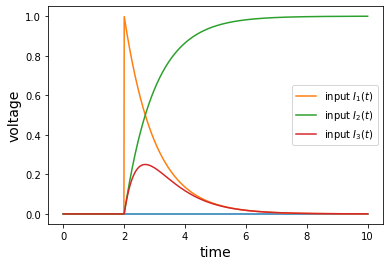

In [11]:
import numpy as np 
from matplotlib import pyplot as plt 

EL = 0
u0 = EL
tau = 1
t0 = 2
tau_s = 0.5
tau_eff = tau_s*tau/(tau_s-tau)

t = np.linspace(0,10,1000)

def f0(t):
    return u0*np.exp(-t/tau) + EL*(1-np.exp(-t/tau))

def f1(t):
    ret = []
    for tt in t:
        if tt < t0:
            ret.append(f0(tt))
        else:
            ret.append(f0(tt) + np.exp(-(tt-t0)/tau))
    return ret

def f2(t):
    ret = []
    for tt in t:
        if tt < t0:
            ret.append(f0(tt))
        else:
            ret.append(f0(tt) + (1 - np.exp(-(tt-t0)/tau)))
    return ret

def f3(t):
    ret = []
    for tt in t:
        if tt < t0:
            ret.append(f0(tt))
        else:
            ret.append(f0(tt) + tau_s/(tau_s-tau) * (np.exp(-(tt-t0)/tau_s) - np.exp(-(tt-t0)/tau)))
    return ret

plt.plot(t, f0(t))
plt.plot(t, f1(t), label=r'input $I_1(t)$')
plt.plot(t, f2(t), label=r'input $I_2(t)$')
plt.plot(t, f3(t), label=r'input $I_3(t)$')
plt.xlabel('time', fontsize=14)
plt.ylabel('voltage', fontsize=14)
plt.legend()
plt.show()

## Additional note  
If take again the differential equation, we define $u - E_L = v$ (hence $\frac{dv}{dt} = \frac{du}{dt}$) and we set $v(0) = 0$, the solution of the differential equation in the Laplace domain becomes
$$ \tilde v(s) = \frac{1}{C_m \tau} \frac{\tilde I(s)}{s + 1/\tau} = \frac{1/\tau}{s+1/\tau} \frac{\tilde I(s)}{C_m} \equiv \frac{\omega_0}{s+\omega_0} \, \tilde v_{in}(s)$$
we get the transfer function $H(s) = \frac{\tilde v_{out}(s)}{\tilde v_{in}(s)}$ of a low pass filter with cutoff frequency $\omega_0 = \frac{1}{\tau}$